## Case Study: Corona Cases in the UK

You are going to work with coronavirus data from the United Kingdom (UK) and you are asked to use Python as the language for your solution.

Please use one of the open-source APIs provided through https://coronavirus.data.gov.uk/ to retrieve coronavirus overview data for the UK. We are interested in daily values.

Make sure to include the date, new cases by specimen date, patients in hospital, new daily national statistics office deaths by death date, new people vaccinated 1st dose by publish date, new people vaccinated 2nd dose by publish date, and new people vaccinated with a booster dose plus new people vaccinated with a third dose by publish date in your data.

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns
from functools import reduce
import warnings
warnings.filterwarnings('ignore') 

**1. Once you retrieved the data, read it into a pandas DataFrame and do some exploratory data analysis.**

In [252]:
df1=pd.read_csv("cases.csv")
cases=df1[["date","newCasesBySpecimenDate"]]
cases

,date,newCasesBySpecimenDate
0,2022-02-14,28669
1,2022-02-13,39626
2,2022-02-12,36303
3,2022-02-11,43410
4,2022-02-10,51117
...,...,...
742,2020-02-03,3
743,2020-02-02,1
744,2020-02-01,0
745,2020-01-31,0


In [253]:
df2=pd.read_csv("patients.csv")
patients=df2[["date", "hospitalCases"]]
patients

,date,hospitalCases
0,2022-02-14,12304
1,2022-02-13,12093
2,2022-02-12,12056
3,2022-02-11,12414
4,2022-02-10,12853
...,...,...
685,2020-03-31,12597
686,2020-03-30,11093
687,2020-03-29,9525
688,2020-03-28,8278


In [254]:
df3=pd.read_csv("deaths.csv")
deaths=df3[["date", "newDailyNsoDeathsByDeathDate"]]
deaths

,date,newDailyNsoDeathsByDeathDate
0,2022-02-04,83
1,2022-02-03,119
2,2022-02-02,131
3,2022-02-01,169
4,2022-01-31,175
...,...,...
732,2020-02-03,0
733,2020-02-02,1
734,2020-02-01,0
735,2020-01-31,0


In [255]:
df4=pd.read_csv("first_dose.csv")
first_dose=df4[["date", "newPeopleVaccinatedFirstDoseByPublishDate"]]
first_dose

,date,newPeopleVaccinatedFirstDoseByPublishDate
0,2022-02-14,8107.0
1,2022-02-13,7494.0
2,2022-02-12,15181.0
3,2022-02-11,11075.0
4,2022-02-10,11614.0
...,...,...
396,2021-01-14,316694.0
397,2021-01-13,278943.0
398,2021-01-12,207661.0
399,2021-01-11,145076.0


In [256]:
df5=pd.read_csv("second_dose.csv")
second_dose=df5[["date", "newPeopleVaccinatedSecondDoseByPublishDate"]]
second_dose

,date,newPeopleVaccinatedSecondDoseByPublishDate
0,2022-02-14,18172.0
1,2022-02-13,13623.0
2,2022-02-12,26309.0
3,2022-02-11,25884.0
4,2022-02-10,26290.0
...,...,...
396,2021-01-14,5257.0
397,2021-01-13,9745.0
398,2021-01-12,16065.0
399,2021-01-11,20768.0


In [257]:
df6=pd.read_csv("third_dose.csv")
third_dose=df6[["date", "newPeopleVaccinatedThirdInjectionByPublishDate"]]
third_dose

,date,newPeopleVaccinatedThirdInjectionByPublishDate
0,2022-02-14,32050.0
1,2022-02-13,19000.0
2,2022-02-12,40102.0
3,2022-02-11,42691.0
4,2022-02-10,34203.0
...,...,...
133,2021-10-04,123877.0
134,2021-10-03,89518.0
135,2021-10-02,194461.0
136,2021-10-01,153912.0


In [258]:
#Bu verileri dataframe'e dönüştürmeden direk merge etmenin bir yolu var mıdır acaba? (Data input options??)

In [259]:
data_frames = [cases, patients, deaths,first_dose, second_dose,third_dose]
df= reduce(lambda  left,right: pd.merge(left,right,on=['date'], how='outer'), data_frames)
column_names=["date","cases", "patients", "deaths", "first_dose", "second_dose", "third_dose"]
df.set_axis(column_names, axis=1, inplace=True)
df

,date,cases,patients,deaths,first_dose,second_dose,third_dose
0,2022-02-14,28669,12304.0,NaN,8107.0,18172.0,32050.0
1,2022-02-13,39626,12093.0,NaN,7494.0,13623.0,19000.0
2,2022-02-12,36303,12056.0,NaN,15181.0,26309.0,40102.0
3,2022-02-11,43410,12414.0,NaN,11075.0,25884.0,42691.0
4,2022-02-10,51117,12853.0,NaN,11614.0,26290.0,34203.0
...,...,...,...,...,...,...,...
742,2020-02-03,3,NaN,0.0,NaN,NaN,NaN
743,2020-02-02,1,NaN,1.0,NaN,NaN,NaN
744,2020-02-01,0,NaN,0.0,NaN,NaN,NaN
745,2020-01-31,0,NaN,0.0,NaN,NaN,NaN


**2. Have a first look at the data.**

In [260]:
df.head()

,date,cases,patients,deaths,first_dose,second_dose,third_dose
0,2022-02-14,28669,12304.0,NaN,8107.0,18172.0,32050.0
1,2022-02-13,39626,12093.0,NaN,7494.0,13623.0,19000.0
2,2022-02-12,36303,12056.0,NaN,15181.0,26309.0,40102.0
3,2022-02-11,43410,12414.0,NaN,11075.0,25884.0,42691.0
4,2022-02-10,51117,12853.0,NaN,11614.0,26290.0,34203.0


**3. Print a summary of the DataFrame (number of rows and columns, non-null count, data types, etc.).**

In [261]:
df.shape

(747, 7)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         747 non-null    object 
 1   cases        747 non-null    int64  
 2   patients     690 non-null    float64
 3   deaths       737 non-null    float64
 4   first_dose   400 non-null    float64
 5   second_dose  400 non-null    float64
 6   third_dose   137 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 46.7+ KB


**4. Have a look at the summary statistics of the DataFrame. What is the maximum number of daily new cases reported for the UK? What's the mean number of daily deaths?**

In [263]:
df.describe()

,cases,patients,deaths,first_dose,second_dose,third_dose
count,747.000000,690.000000,737.000000,400.000000,400.000000,137.000000
mean,24615.495315,9584.002899,248.985075,125589.072500,120964.200000,265388.072993
std,35419.000016,8575.176369,332.004933,141628.107316,133101.435708,211723.361117
min,0.000000,770.000000,0.000000,955.000000,818.000000,10480.000000
25%,2358.500000,2593.500000,32.000000,26085.000000,25797.750000,93476.000000
50%,11900.000000,7430.000000,124.000000,45019.000000,49352.000000,237995.000000
75%,34829.000000,14504.500000,285.000000,190051.500000,179164.250000,370989.000000
max,273486.000000,39255.000000,1486.000000,752308.000000,556951.000000,968665.000000


In [264]:
max_case=df.cases.max()
max_case

273486

In [265]:
mean_death=df.deaths.mean()
mean_death

248.98507462686567

**5. What's the total number of coronavirus cases reported within the period of the dataset?**

In [266]:
sum_cases=df.cases.sum()
sum_cases

18387775

**6. When did the UK start with reporting the number of hospital cases?**

In [267]:
df.date = pd.to_datetime(df["date"])
df[(df.patients.notna())]["date"]

0     2022-02-14
1     2022-02-13
2     2022-02-12
3     2022-02-11
4     2022-02-10
         ...    
685   2020-03-31
686   2020-03-30
687   2020-03-29
688   2020-03-28
689   2020-03-27
Name: date, Length: 690, dtype: datetime64[ns]

In [268]:
hospital_start_date=df[(df.patients.notna())]["date"].dt.date.min()
hospital_start_date

datetime.date(2020, 3, 27)

**7. Around which time did the UK start with vaccinating people?**

In [269]:
df[(df.first_dose.notna())]["date"]

0     2022-02-14
1     2022-02-13
2     2022-02-12
3     2022-02-11
4     2022-02-10
         ...    
395   2021-01-15
396   2021-01-14
397   2021-01-13
398   2021-01-12
399   2021-01-11
Name: date, Length: 400, dtype: datetime64[ns]

In [270]:
vacc_start_date=df[(df.first_dose.notna())]["date"].dt.date.min()
vacc_start_date

datetime.date(2021, 1, 11)

**8. Visualise the development of the number of daily new cases over the period of the complete dataset. Make sure to have the oldest date at the left and the newest date at the right of the plot.**

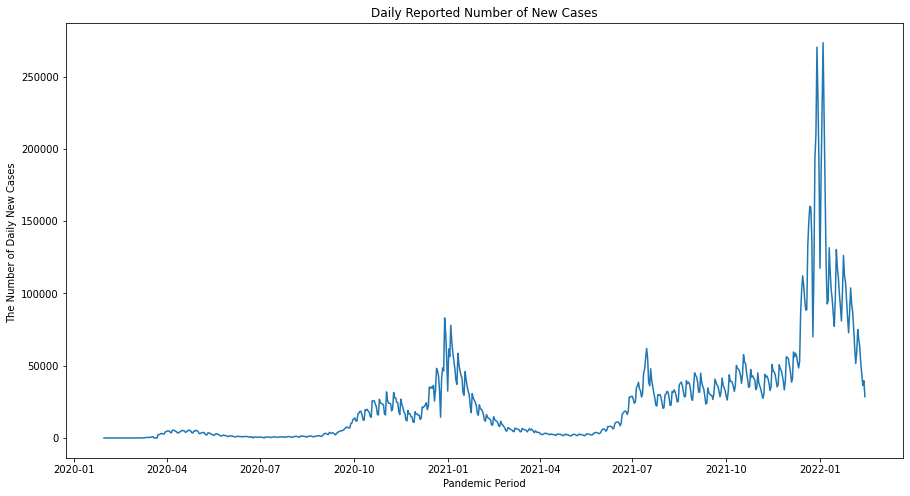

In [271]:
plt.figure(figsize=(15, 8))
ax=sns.lineplot(x="date", y="cases", data=df)
ax.set_xlabel("Pandemic Period")
ax.set_ylabel("The Number of Daily New Cases ")
ax.set_title("Daily Reported Number of New Cases");

**9. Have a closer look at the development of the number of daily new cases during the first wave of the pandemic (from February till June 2020). Can you detect any abnormalities and/or pattern in the data? Do you have an idea of how to deal with that?**

In [272]:
first_wave = df.loc[((df["date"] >= "2020-2-1") & (df["date"] <= "2020-7-1")), ["date", "cases"]]
first_wave

,date,cases
593,2020-07-01,652
594,2020-06-30,623
595,2020-06-29,724
596,2020-06-28,449
597,2020-06-27,653
...,...,...
740,2020-02-05,1
741,2020-02-04,0
742,2020-02-03,3
743,2020-02-02,1


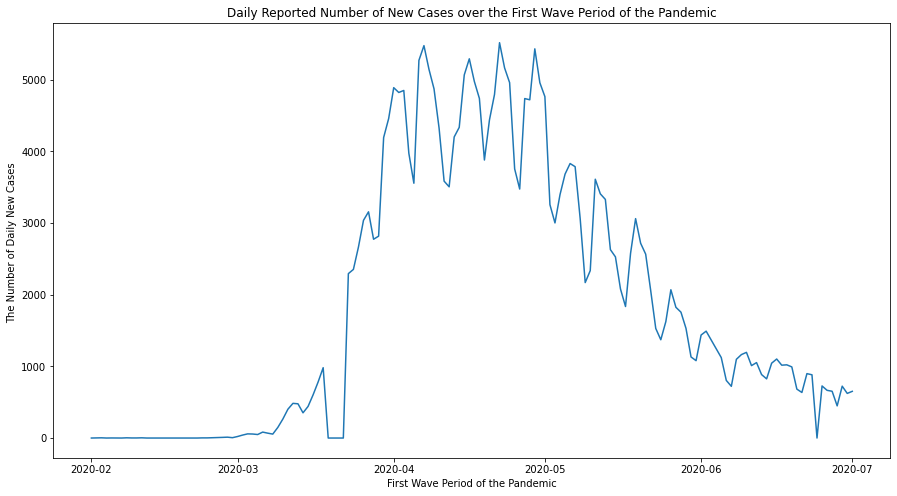

In [273]:
plt.figure(figsize=(15, 8))
ax=sns.lineplot(x="date", y="cases", data=first_wave)
ax.set_xlabel("First Wave Period of the Pandemic")
ax.set_ylabel("The Number of Daily New Cases ")
ax.set_title('Daily Reported Number of New Cases over the First Wave Period of the Pandemic');


**Solution:** There are some missing values between 2020-03 and 2020-04. To deal with this problem, we can use interpolate function. This way we can fill in the missing values so that they form a linear line on the graph.

In [274]:
first_wave[(first_wave["date"] >= "2020-3-1") & (first_wave["date"] <= "2020-4-1") & (first_wave["cases"]==0)]

,date,cases
694,2020-03-22,0
695,2020-03-21,0
696,2020-03-20,0
697,2020-03-19,0


In [275]:
first_wave.cases.replace(0, np.NaN, inplace=True)
first_wave.interpolate("ffill")

,date,cases
593,2020-07-01,652.0
594,2020-06-30,623.0
595,2020-06-29,724.0
596,2020-06-28,449.0
597,2020-06-27,653.0
...,...,...
740,2020-02-05,1.0
741,2020-02-04,1.0
742,2020-02-03,3.0
743,2020-02-02,1.0


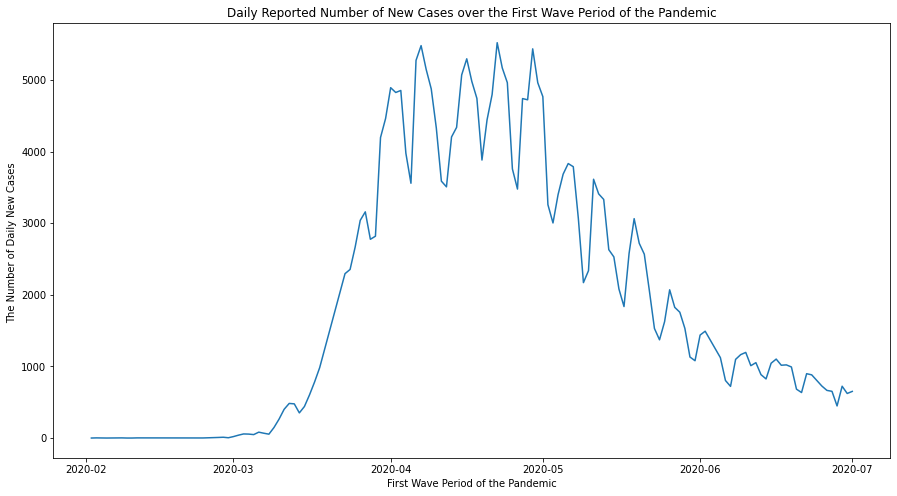

In [276]:
plt.figure(figsize=(15, 8))
ax=sns.lineplot(x="date", y="cases", data=first_wave)
ax.set_xlabel("First Wave Period of the Pandemic")
ax.set_ylabel("The Number of Daily New Cases ")
ax.set_title('Daily Reported Number of New Cases over the First Wave Period of the Pandemic');


**10. Plot the development of the number of daily new cases and the development of the daily reported number of patients in hospital over the period of the complete dataset. What can you say about that?**

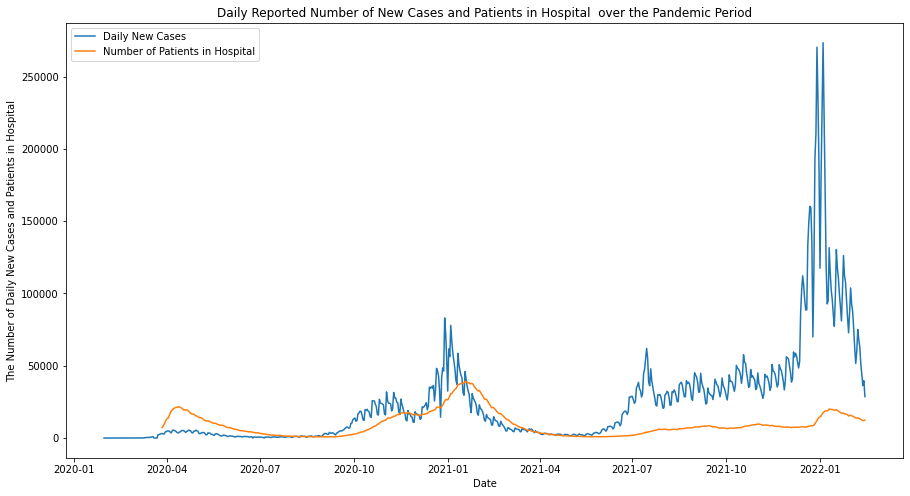

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot("date", "cases", data=df, ax=ax, label="Daily New Cases")
sns.lineplot("date", "patients", data=df, ax=ax, label="Number of Patients in Hospital")
ax.set_xlabel("Date")
ax.set_ylabel("The Number of Daily New Cases and Patients in Hospital")
ax.set_title('Daily Reported Number of New Cases and Patients in Hospital  over the Pandemic Period');

**Solution:** Although the number of cases increased in the later stages of the pandemic period, the number of patients in the hospital decreased. The reason for the decrease in the number of patients in hospital can be evaluated as the increase in the vaccination rate.

**11. Have a look at the distribution of the values of the daily reported number of deaths. Can you detect outliers and how would you characterise the distribution?**

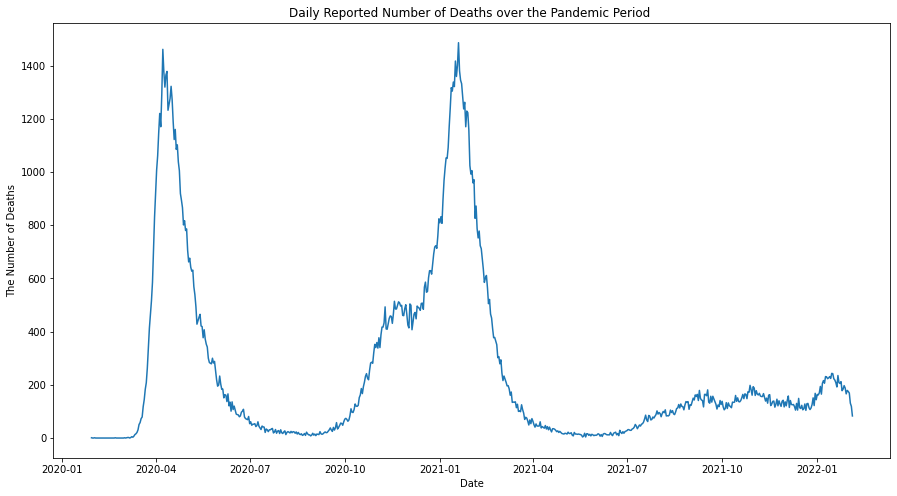

In [ ]:
plt.figure(figsize=(15, 8))
ax=sns.lineplot(x="date", y="deaths", data=df)
ax.set_xlabel("Date")
ax.set_ylabel("The Number of Deaths")
ax.set_title('Daily Reported Number of Deaths over the Pandemic Period ');

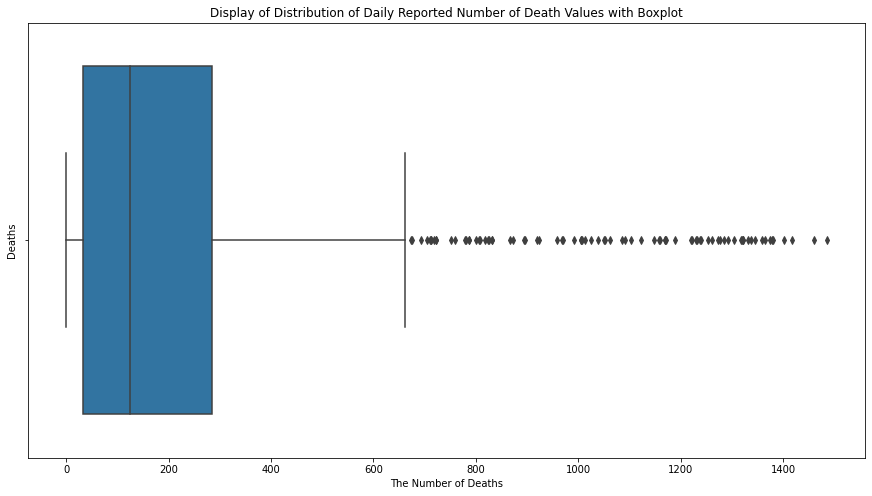

In [ ]:
plt.figure(figsize=(15, 8))
ax=sns.boxplot(x="deaths", data=df)
ax.set_xlabel("The Number of Deaths")
ax.set_ylabel("Deaths")
ax.set_title('Display of Distribution of Daily Reported Number of Death Values with Boxplot');

In [ ]:
low = df.deaths.quantile(0.25)
high = df.deaths.quantile(0.75)
IQR = high - low
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(-347.5, 664.5)

In [ ]:
df[(df.deaths>664)]["deaths"]

368     674.0
369     712.0
370     723.0
371     778.0
372     752.0
        ...  
682    1061.0
683    1007.0
684     924.0
685     831.0
686     711.0
Name: deaths, Length: 83, dtype: float64

**Solution 1:** There are outliers on 83 different days during the pandemic period.

In [ ]:
df[["deaths"]].describe()

,deaths
count,737.000000
mean,248.985075
std,332.004933
min,0.000000
25%,32.000000
50%,124.000000
75%,285.000000
max,1486.000000


In [ ]:
from scipy.stats import kurtosis
print(kurtosis(df.deaths.notna(), fisher=False))

72.71356852103126


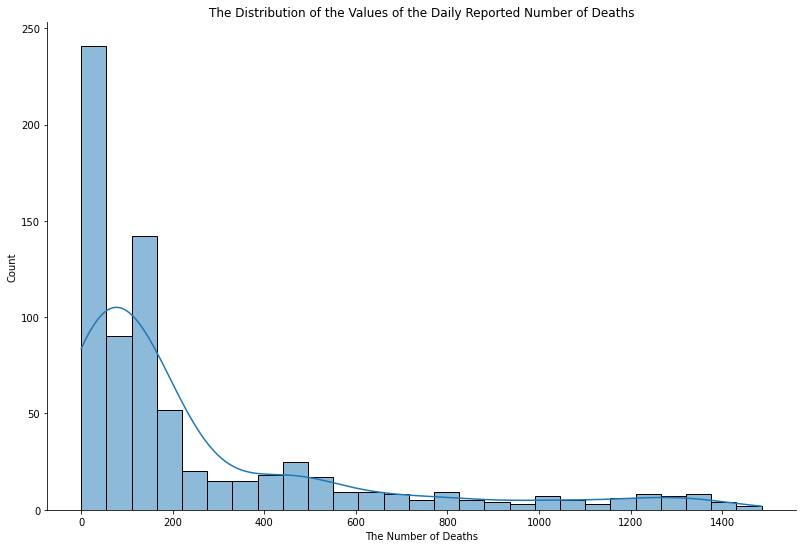

In [ ]:
ax=sns.displot(x="deaths", data=df, kde=True, height=7.5,aspect=1.5)
plt.xlabel("The Number of Deaths")
plt.title('The Distribution of the Values of the Daily Reported Number of Deaths');

**Solution 2:** The distribution is unimodal, (positive) rightskewed and the mean value is bigger than the median value. There is a high rate of outliers in the data.

**12. Finally, look at the vaccination data more closely. Visualise the development of the daily reported number of vaccinations (first dose, second dose, and third/booster dose all in one graph). What can you say about that?**

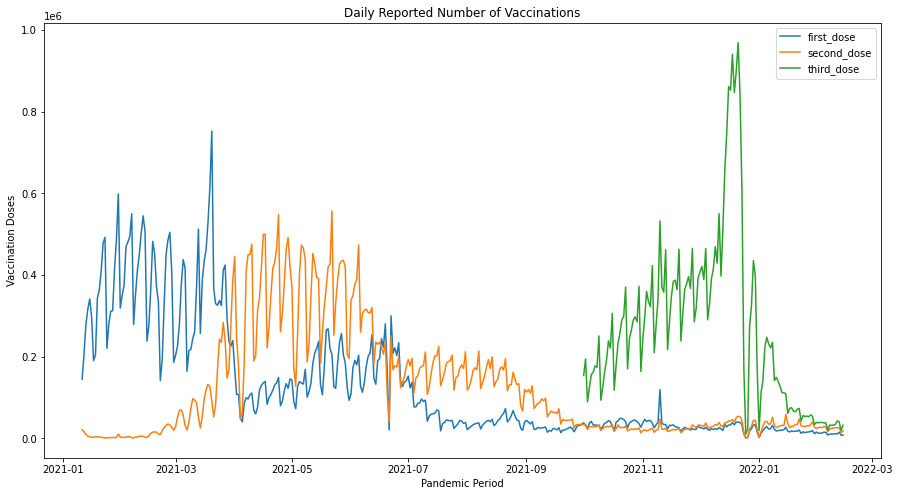

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot("date", "first_dose", data=df, ax=ax, label="first_dose")
sns.lineplot("date", "second_dose", data=df, ax=ax, label="second_dose")
sns.lineplot("date", "third_dose", data=df, ax=ax, label="third_dose")
ax.set_xlabel('Pandemic Period')
ax.set_ylabel('Vaccination Doses')
ax.set_title('Daily Reported Number of Vaccinations');

**Solution:** The first-dose vaccination started in January 2021, with the majority of the population finishing the first-dose vaccination in April 2021. After this period, the number of first dose vaccinations decreased and the number of second dose vaccinations increased. The second dose of vaccination continued until October 2021. After this period, a third dose of vaccination was needed. The third dose of vaccination was completed in a shorter time than the other doses and there is a correlation between the increase in the number of patients in the hospital and the number of third dose vaccines on the same dates. Here, the importance of vaccination has been seen and the demand for vaccination has increased. By February 2022, it seems that the third dose of vaccinations has been completed and therefore the number of vaccinations has decreased.

**13. Use a stacked bar plot to visualise the total number of vaccinations (first dose, second dose, and third/booster dose) per month for the year 2021. Each bar should show the proportion of first, second, and third/booster doses for that month.**

In [ ]:
df_2021=df[(df["date"] >= "2021-1-1") & (df["date"] <= "2021-12-31")]
df_2021

,date,cases,patients,deaths,first_dose,second_dose,third_dose
45,2021-12-31,186787,14303.0,144.0,15384.0,22070.0,167060.0
46,2021-12-30,234256,13270.0,168.0,33371.0,44107.0,397554.0
47,2021-12-29,270394,12076.0,122.0,32607.0,43766.0,435293.0
48,2021-12-28,210668,11029.0,151.0,23859.0,29534.0,325087.0
49,2021-12-27,193302,9867.0,126.0,18191.0,23706.0,273485.0
...,...,...,...,...,...,...,...
405,2021-01-05,66627,30687.0,968.0,NaN,NaN,NaN
406,2021-01-04,77968,30776.0,896.0,NaN,NaN,NaN
407,2021-01-03,56331,29034.0,807.0,NaN,NaN,NaN
408,2021-01-02,61651,27562.0,832.0,NaN,NaN,NaN


In [ ]:
doses=df_2021.groupby(df["date"].dt.strftime("%B"))[["first_dose", "second_dose", "third_dose"]].sum()
doses

,first_dose,second_dose,third_dose
date,,,
April,3214761.0,10443855.0,0.0
August,1271526.0,4587816.0,0.0
December,792511.0,1034945.0,15483674.0
February,10979084.0,321607.0,0.0
January,7009795.0,102810.0,0.0
July,1955404.0,5273972.0,0.0
June,5383820.0,7313480.0,0.0
March,10871993.0,3697642.0,0.0
May,5114953.0,10777406.0,0.0


In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
doses=doses.reindex(new_order)
doses

,first_dose,second_dose,third_dose
date,,,
January,7009795.0,102810.0,0.0
February,10979084.0,321607.0,0.0
March,10871993.0,3697642.0,0.0
April,3214761.0,10443855.0,0.0
May,5114953.0,10777406.0,0.0
June,5383820.0,7313480.0,0.0
July,1955404.0,5273972.0,0.0
August,1271526.0,4587816.0,0.0
September,775582.0,1991845.0,0.0


In [ ]:
total=doses.sum(axis=1)
newtotal=pd.concat([total]*3)
newtotal

date
January       7112605.0
February     11300691.0
March        14569635.0
April        13658616.0
May          15892359.0
June         12697300.0
July          7229376.0
August        5859342.0
September     2767427.0
October       8589464.0
November     12186782.0
December     17311130.0
January       7112605.0
February     11300691.0
March        14569635.0
April        13658616.0
May          15892359.0
June         12697300.0
July          7229376.0
August        5859342.0
September     2767427.0
October       8589464.0
November     12186782.0
December     17311130.0
January       7112605.0
February     11300691.0
March        14569635.0
April        13658616.0
May          15892359.0
June         12697300.0
July          7229376.0
August        5859342.0
September     2767427.0
October       8589464.0
November     12186782.0
December     17311130.0
dtype: float64

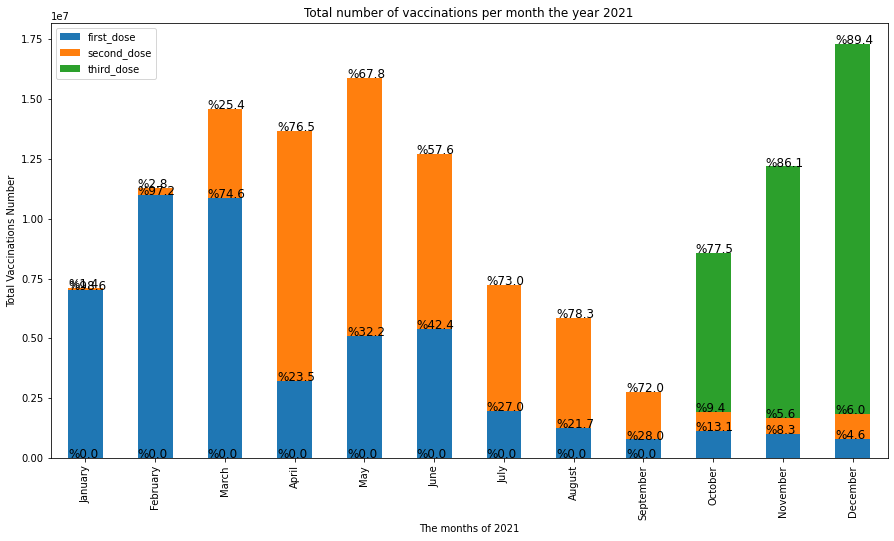

In [ ]:
ax=doses.plot(kind = 'bar',
                  stacked = True, title = 'Total number of vaccinations per month the year 2021',
                  figsize=(15,8),
                  xlabel="The months of 2021",
                  ylabel="Total Vaccinations Number");

for bar, j in zip(ax.patches, range(0, len(newtotal))):
  b = bar.get_bbox()
  ax.annotate("%" + str(round(100*bar.get_height()/newtotal[j], 1)),
                ((b.x0 + b.x1-0.5)/2 , b.y1 ),
                    size=12)